# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1736210985813.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Open,High,Low
0,01/03/2025,5942.47,5891.07,5949.34,5888.66
1,01/02/2025,5868.55,5903.26,5935.09,5829.53
2,12/31/2024,5881.63,5919.74,5929.74,5868.86
3,12/30/2024,5906.94,5920.67,5940.79,5869.16
4,12/27/2024,5970.84,6006.17,6006.17,5932.95
...,...,...,...,...,...
2519,01/12/2015,2028.26,2046.13,2049.30,2022.58
2520,01/09/2015,2044.81,2063.45,2064.43,2038.33
2521,01/08/2015,2062.14,2030.61,2064.08,2030.61
2522,01/07/2015,2025.90,2005.55,2029.61,2005.55


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2524.000000,2524.000000,2524.000000,2524.000000
mean,3355.073554,3348.059049,3365.835210,3328.926450
std,1086.394967,1100.073341,1105.609751,1094.405886
min,1829.080000,0.000000,0.000000,0.000000
25%,2429.375000,2431.125000,2440.000000,2416.937500
50%,3003.855000,3003.720000,3015.545000,2988.680000
75%,4204.595000,4206.072500,4233.617500,4185.057500
max,6090.270000,6089.030000,6099.970000,6079.980000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2516.000000,2516.000000,2516.000000,2516.000000
mean,3359.200461,3358.704706,3376.537389,3339.511272
std,1085.643473,1085.468075,1090.921862,1079.894401
min,1829.080000,1833.400000,1847.000000,1810.100000
25%,2432.990000,2432.007500,2442.077500,2421.950000
50%,3006.210000,3008.040000,3017.260000,2992.760000
75%,4205.957500,4207.700000,4236.477500,4188.055000
max,6090.270000,6089.030000,6099.970000,6079.980000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2523
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2516 non-null   object 
 1   Close/Last  2516 non-null   float64
 2   Open        2516 non-null   float64
 3   High        2516 non-null   float64
 4   Low         2516 non-null   float64
dtypes: float64(4), object(1)
memory usage: 117.9+ KB


In [5]:
df.shape

(2516, 5)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

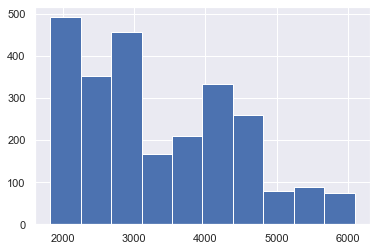

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

5942.47

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

3359.200461049286

In [10]:
close_sd = df['Close/Last'].std()
close_sd

1085.6434733736273

In [11]:
sigma1 = close_mean + close_sd
sigma1

4444.843934422914

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

5530.4874077965405

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

6073.309144483354

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2523
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2516 non-null   datetime64[ns]
 1   Close/Last  2516 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2015-01-06 to 2025-01-03')

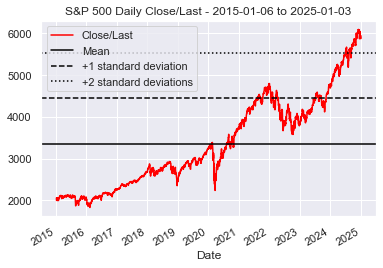

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2015-01-06 to 2025-01-03')

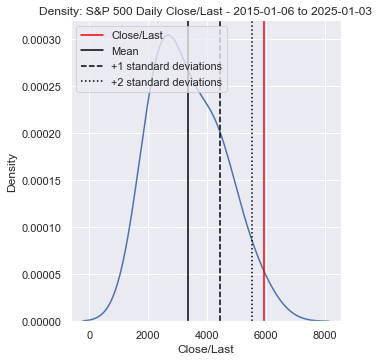

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_current, color=c, label='Close/Last')
plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

2.3794824012741747

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results